In [1]:
%matplotlib inline

import pandas as pd

r = pd.read_csv( '../goodbooks-10k/ratings.csv' )
b = pd.read_csv( '../goodbooks-10k/books.csv' )



### Ratings

In [2]:
r.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


Ratings are sorted chronologically, oldest first.

In [3]:
len(r)

5976479

<Axes: >

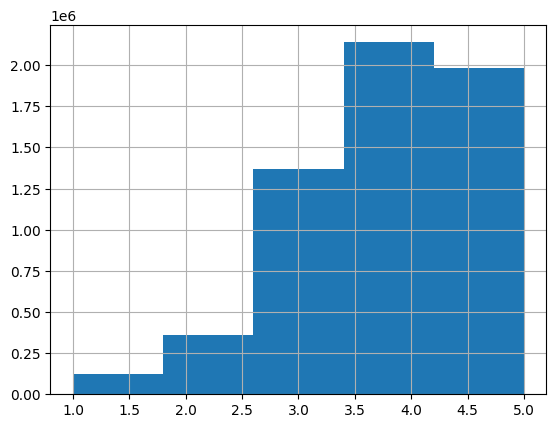

In [4]:
r.rating.hist( bins = 5 )

It appears that 4 is the most popular rating. There are relatively few ones and twos.

### Books

In [5]:
b.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


Books are sorted by their popularity, as measured by number of ratings (overall, not in this dataset).

In [6]:
len(b)

10000

### User and book IDs

In [7]:
r.user_id.max()

np.int64(53424)

In [8]:
r.book_id.max()

np.int64(10000)

The IDs are contiguous.

In [9]:
assert( len( r.user_id.unique()) == r.user_id.max())
assert( len( r.book_id.unique()) == r.book_id.max())

### Reviews per book

Most books have a few hundred reviews, but some have as few as eight.

In [10]:
reviews_per_book = r.groupby( 'book_id' ).book_id.apply( lambda x: len( x ))
reviews_per_book.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: book_id, dtype: float64

In [11]:
reviews_per_book.sort_values().head( 10 )

book_id
7803     8
9345    11
9486    24
1935    33
9315    36
9553    41
8181    45
9260    48
9479    48
9705    50
Name: book_id, dtype: int64

### Reviews per user

All users have at least 19 reviews.

In [12]:
reviews_per_user = r.groupby( 'user_id' ).user_id.apply( lambda x: len( x ))
reviews_per_user.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [13]:
reviews_per_user.sort_values().head( 10 )

user_id
34590    19
43675    20
51725    21
40753    21
32128    21
16470    22
48077    22
25856    22
40299    22
42736    22
Name: user_id, dtype: int64

Take books and have a look at reviews per book


In [14]:

# Merge ratings with books on book_id
merged = pd.merge(r, b, left_on='book_id', right_on='book_id', how='left')

# Group by book id and title, then count number of ratings
rating_counts = merged.groupby(['book_id', 'title']).size().reset_index(name='rating_count')

#Sort by review count descending
rating_counts = rating_counts.sort_values(by='rating_count', ascending=False)

#Display the result
rating_counts.head(50)

,book_id,title,rating_count
0,1,"The Hunger Games (The Hunger Games, #1)",22806
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,21850
3,4,To Kill a Mockingbird,19088
2,3,"Twilight (Twilight, #1)",16931
4,5,The Great Gatsby,16604
16,17,"Catching Fire (The Hunger Games, #2)",16549
19,20,"Mockingjay (The Hunger Games, #3)",15953
17,18,Harry Potter and the Prisoner of Azkaban (Harr...,15855
22,23,Harry Potter and the Chamber of Secrets (Harry...,15657
6,7,The Hobbit,15558


It is clear that we are going to have to filter out a lot of ratings to meet the 10,000 csv file line requirement of the project. Start by choosing the first N works and filtering the dataset to only use ratings for those N works.

In [35]:
N_WORKS = 50

def filterDataset(N):

    b_filter = b.head(N_WORKS)

    b_filter_ids = set(b_filter['book_id'])

    r_filter = r[r['book_id'].isin(b_filter_ids)]

    r_filter = r_filter.reset_index(drop=True)
    return b_filter, r_filter

b_filter, r_filter = filterDataset(N_WORKS)
r_filter.describe()



,user_id,book_id,rating
count,644864.000000,644864.000000,644864.000000
mean,26254.365286,22.595425,4.013842
std,15478.648707,14.264910,1.031932
min,1.000000,1.000000,1.000000
25%,12830.000000,10.000000,3.000000
50%,25882.000000,22.000000,4.000000
75%,39688.000000,34.000000,5.000000
max,53424.000000,50.000000,5.000000


There is still approx 645000 ratings for just the first 50 books (mean rating approx 26k). So, sample each books ratings to have a 1% of the total ratings for that book, floored at 5 ratings (or if original number is less than 5, then just the original ratings) 

In [36]:
def sample_ratings(group, fraction=0.01):
    n = len(group)
    if n < 5:
        return group  # Keep all ratings
    sample_size = max(5, int(n * fraction))
    return group.sample(n=sample_size, random_state=42)

fraction = 0.01

def apply_sample_ratings(group, include_group=None):
    return sample_ratings(group, fraction)

sampled_r_filter = (
    r_filter
    .groupby('book_id')
    .apply(apply_sample_ratings, include_groups=False)
    .reset_index(drop=True)
)

sampled_r_filter.describe()

csv_rows = len(sampled_r_filter)+len(b_filter)
print(csv_rows, 'csv rows')

6474 csv rows


ok try with 99 works:



In [41]:
N_WORKS=99
b_filter, r_filter = filterDataset(N_WORKS)
r_filter.describe()

,user_id,book_id,rating
count,988536.000000,988536.000000,988536.000000
mean,26163.875541,40.015361,3.971437
std,15438.163870,27.782999,1.034272
min,1.000000,1.000000,1.000000
25%,12761.000000,17.000000,3.000000
50%,25739.000000,35.000000,4.000000
75%,39529.000000,61.000000,5.000000
max,53424.000000,99.000000,5.000000


Now filter the ratings:

In [42]:
fraction = 0.01

def apply_sample_ratings(group, include_group=None):
    return sample_ratings(group, fraction)

sampled_r_filter = (
    r_filter
    .groupby('book_id')
    .apply(apply_sample_ratings, include_groups=False)
    .reset_index(drop=True)
)

sampled_r_filter.describe()
csv_rows = len(sampled_r_filter)+len(b_filter)
print(csv_rows, 'csv rows')

9937 csv rows


It turns out that using N=100 gives 10,001 csv rows, so we stick with N=99 and output the data to csv

In [43]:
import os

output_dir = os.getcwd()

# Save each filtered dataset
b_filter.to_csv(os.path.join(output_dir, "filtered_books.csv"), index=False)
sampled_r_filter.to_csv(os.path.join(output_dir, "filtered_ratings.csv"), index=False)

print("CSV files saved to:", output_dir)


CSV files saved to: C:\Users\richp\source\bookrating\goodbooks-10k-filtered
